In [192]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [193]:
device = 'mps' if torch.mps.is_available() else 'cpu'
print(f'Using: {device}')

Using: mps


In [194]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [195]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [196]:
def plot_predictions(training_data=X_train, training_label=y_train, testing_data=X_test, testing_label=y_test, predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(training_data, training_label, c='b', s=4, label='Training')
    plt.scatter(testing_data, testing_label, c='g', s=4, label='Testing')
    if predictions is not None:
        plt.scatter(testing_label, predictions, c='r', s=4, label='Predictions')
    plt.legend()
    plt.show()

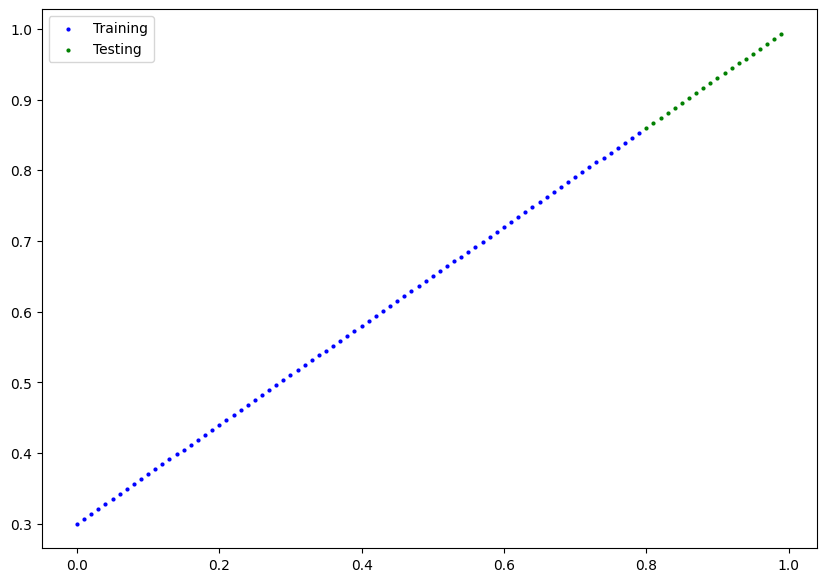

In [197]:
plot_predictions(X_train, y_train, X_test, y_test)

In [198]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [199]:
next(model.parameters()).device

device(type='cpu')

In [200]:
model.to(device)
next(model.parameters()).device

device(type='mps', index=0)

In [205]:
X_test = y_test.to(device)

with torch.inference_mode():
    y_pred_00 = model(X_test)

y_pred_00

tensor([[1.4875],
        [1.4929],
        [1.4982],
        [1.5036],
        [1.5089],
        [1.5143],
        [1.5196],
        [1.5250],
        [1.5303],
        [1.5357],
        [1.5410],
        [1.5464],
        [1.5517],
        [1.5571],
        [1.5624],
        [1.5678],
        [1.5731],
        [1.5785],
        [1.5838],
        [1.5892]], device='mps:0')

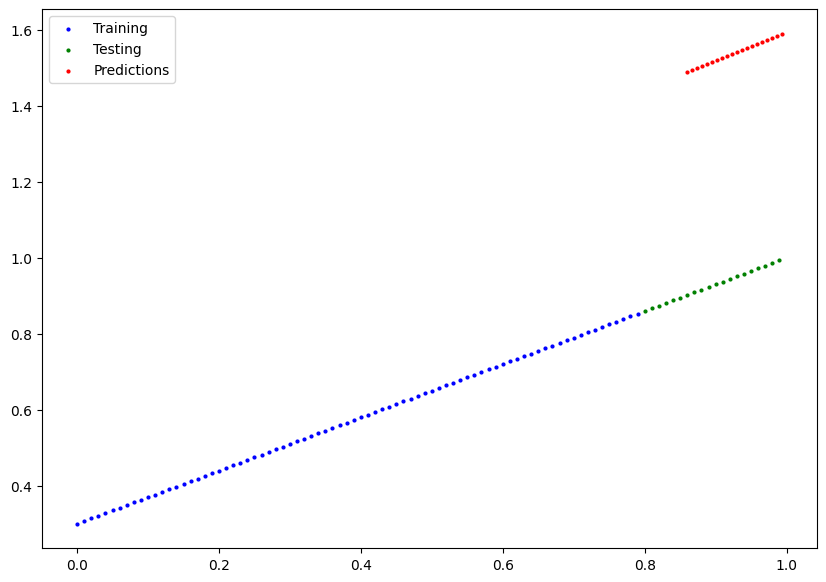

In [206]:
plot_predictions(predictions=y_pred_00.cpu())

In [207]:
loss_fn = torch.nn.L1Loss()
loss_fn

L1Loss()

In [208]:
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [209]:
def plot_loss_curves(epochs_count, training_loss_values, testing_loss_values):
    train_loss = np.array(torch.tensor(training_loss_values).numpy())
    test_loss = np.array(torch.tensor(testing_loss_values).numpy())
    
    plt.figure(figsize=(8, 6))
    plt.plot(epochs_count, train_loss, label='Training Loss')
    plt.plot(epochs_count, test_loss, label='Testing Loss')
    plt.title('Testing and Training Loss Curves')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

Epochs: 0 | Training Loss: 0.5555006265640259 | Testing Loss: 0.4752560555934906
OrderedDict([('linear_layer.weight', tensor([[0.7250]], device='mps:0')), ('linear_layer.bias', tensor([0.7300], device='mps:0'))])
Epochs: 2 | Training Loss: 0.3242955803871155 | Testing Loss: 0.20206256210803986
OrderedDict([('linear_layer.weight', tensor([[0.6460]], device='mps:0')), ('linear_layer.bias', tensor([0.5300], device='mps:0'))])
Epochs: 4 | Training Loss: 0.09309055656194687 | Testing Loss: 0.07113095372915268
OrderedDict([('linear_layer.weight', tensor([[0.5670]], device='mps:0')), ('linear_layer.bias', tensor([0.3300], device='mps:0'))])
Epochs: 6 | Training Loss: 0.03367490693926811 | Testing Loss: 0.10466863960027695
OrderedDict([('linear_layer.weight', tensor([[0.5740]], device='mps:0')), ('linear_layer.bias', tensor([0.2900], device='mps:0'))])


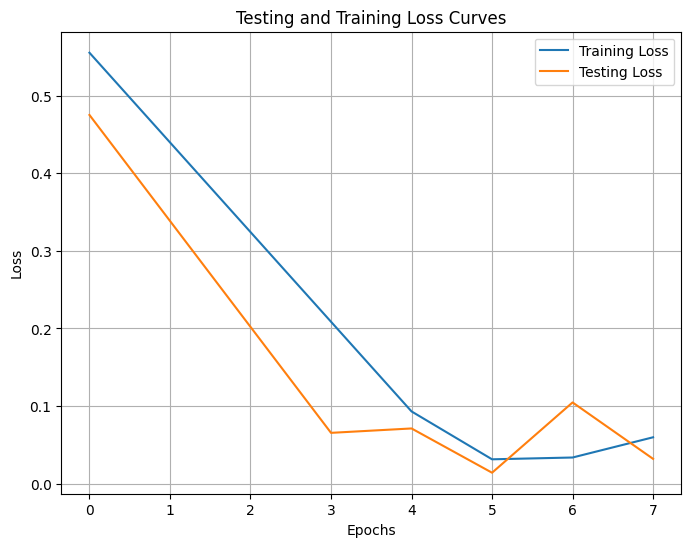

In [210]:
torch.manual_seed(42)

epochs = 8

epochs_count = []
training_loss_values = []
testing_loss_values = []

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = y_test.to(device)
y_test = X_test.to(device)


for epoch in range(epochs):

    model.train()
    training_pred = model(X_train)
    training_loss = loss_fn(training_pred, y_train)
    optimizer.zero_grad()
    training_loss.backward()
    optimizer.step()
    model.eval()

    with torch.inference_mode():
        testing_pred = model(X_test)
        testing_loss = loss_fn(testing_pred, y_test)

    epochs_count.append(epoch)
    training_loss_values.append(training_loss.item())
    testing_loss_values.append(testing_loss.item())

    if epoch % 2 == 0:
        print(f'Epochs: {epoch} | Training Loss: {training_loss.item()} | Testing Loss: {testing_loss.item()}')
        print(model.state_dict())

plot_loss_curves(epochs_count, training_loss_values, testing_loss_values)

In [211]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6135]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3900], device='mps:0'))])

In [212]:
model.eval()

with torch.inference_mode():
    y_pred_0 = model(X_test)

y_pred_0

tensor([[0.9176],
        [0.9219],
        [0.9262],
        [0.9305],
        [0.9348],
        [0.9391],
        [0.9434],
        [0.9477],
        [0.9520],
        [0.9563],
        [0.9606],
        [0.9649],
        [0.9692],
        [0.9735],
        [0.9778],
        [0.9820],
        [0.9863],
        [0.9906],
        [0.9949],
        [0.9992]], device='mps:0')

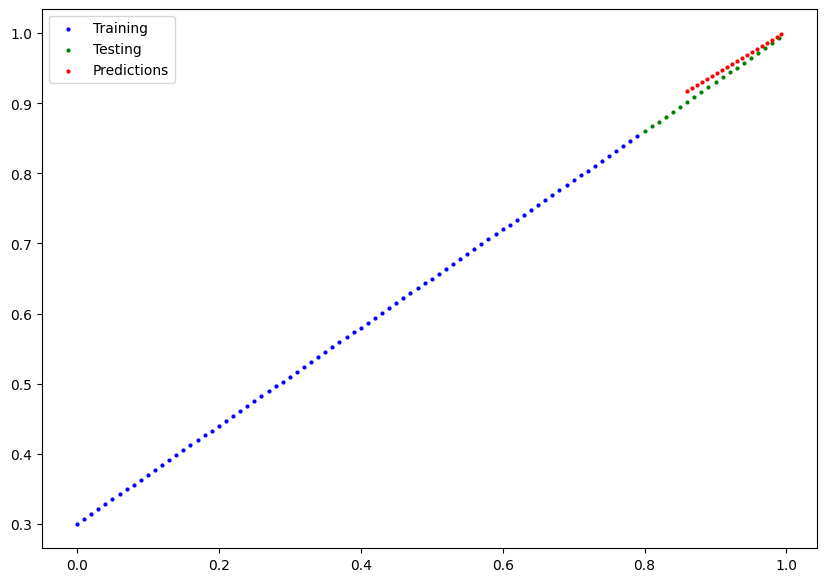

In [213]:
plot_predictions(predictions=y_pred_0.cpu())

In [214]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_putting_it_together.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_putting_it_together.pth')

In [215]:
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [216]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [220]:
next(loaded_model.parameters()).device

loaded_model.eval()

with torch.inference_mode():
    y_pred_loaded = loaded_model(X_test.cpu())

y_pred_loaded

tensor([[0.9176],
        [0.9219],
        [0.9262],
        [0.9305],
        [0.9348],
        [0.9391],
        [0.9434],
        [0.9477],
        [0.9520],
        [0.9563],
        [0.9606],
        [0.9649],
        [0.9692],
        [0.9735],
        [0.9778],
        [0.9820],
        [0.9863],
        [0.9906],
        [0.9949],
        [0.9992]])

In [221]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6135]])),
             ('linear_layer.bias', tensor([0.3900]))])

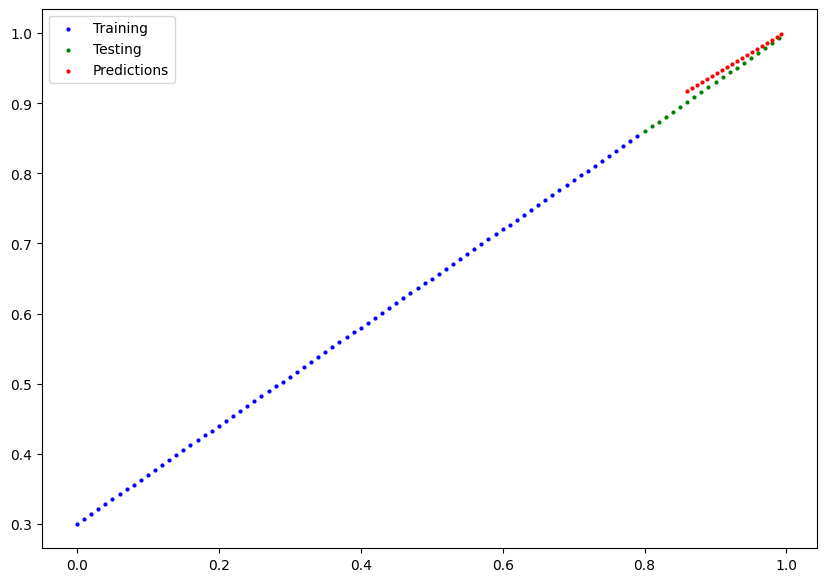

In [222]:
plot_predictions(predictions=y_pred_loaded.cpu())